In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))


In [2]:
across_channels_mAP_file_path <- file.path("../results/mAP_across_channels.parquet")
figures_path <- file.path("../figures")
if (!dir.exists(figures_path)) {
  dir.create(figures_path)
}


across_channels_mAP <- arrow::read_parquet(across_channels_mAP_file_path)
dim(across_channels_mAP)
head(across_channels_mAP)

[1] 3744   12

Metadata_Time,Metadata_dose,Metadata_reference_index,mean_average_precision,indices,p_value,corrected_p_value,below_p,below_corrected_p,-log10(p-value),Channel,shuffle
<dbl>,<dbl>,<int>,<dbl>,<list<integer>>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>
0,0.61,-1,1,"0, 8, 14",9.99999e-07,9.99999e-07,TRUE,TRUE,6,CL_488_1,non_shuffled
0,1.22,-1,1,"9, 19, 22",9.99999e-07,9.99999e-07,TRUE,TRUE,6,CL_488_1,non_shuffled
0,2.44,-1,1,"3, 21, 26",9.99999e-07,9.99999e-07,TRUE,TRUE,6,CL_488_1,non_shuffled
0,4.88,-1,1,"13, 17, 25",9.99999e-07,9.99999e-07,TRUE,TRUE,6,CL_488_1,non_shuffled
0,9.77,-1,1,"6, 7, 18",9.99999e-07,9.99999e-07,TRUE,TRUE,6,CL_488_1,non_shuffled
0,19.53,-1,1,"1, 11, 20",9.99999e-07,9.99999e-07,TRUE,TRUE,6,CL_488_1,non_shuffled


In [3]:
# set the time in minutes
across_channels_mAP$Metadata_Time <- across_channels_mAP$Metadata_Time * 30

In [4]:
unique(across_channels_mAP$Channel)
# replace CL_488_1 with CL 488_1
across_channels_mAP$Channel <- gsub("CL_488_1_CL_488_2_CL_561_DNA", "All Channels", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("CL_488_1_CL_488_2_CL_561", "Remove\nDNA", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("CL_488_1_CL_488_2_DNA", "Remove\nCL 561", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("CL_488_1_CL_561_DNA", "Remove\nCL 488_2", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("CL_488_2_CL_561_DNA", "Remove\nCL 488_1", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("CL_488_1", "CL 488_1", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("CL_488_2", "CL 488_2", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("CL_561", "CL 561", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("1_CL", "1\n+ CL", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("2_CL", "2\n+ CL", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("1_DNA", "1\n+ DNA", across_channels_mAP$Channel)
across_channels_mAP$Channel <- gsub("2_DNA", "2\n+ DNA", across_channels_mAP$Channel)



unique(across_channels_mAP$Channel)
across_channels_mAP$Channel <- factor(
    across_channels_mAP$Channel,
    levels = c(
        'All Channels',
       
        'Remove\nCL 488_1',
        'Remove\nCL 488_2',
        'Remove\nCL 561',
        'Remove\nDNA',

        'CL 488_1\n+ CL 488_2',
        'CL 488_1\n+ CL 561',
        'CL 488_1\n+ DNA',
        'CL 488_2\n+ CL 561',
        'CL 488_2\n+ DNA',
        'CL 561\n+ DNA',
        
        'CL 488_1',
        'CL 488_2',
        'CL 561',
        'DNA',
        'None'
    )
)


[1] "CL_488_1"                     "CL_488_2"                    
 [3] "CL_561"                       "DNA"                         
 [5] "CL_488_1_CL_488_2"            "CL_488_1_CL_561"             
 [7] "CL_488_1_DNA"                 "CL_488_2_CL_561"             
 [9] "CL_488_2_DNA"                 "CL_561_DNA"                  
[11] "CL_488_1_CL_488_2_CL_561"     "CL_488_1_CL_488_2_DNA"       
[13] "CL_488_1_CL_561_DNA"          "CL_488_2_CL_561_DNA"         
[15] "CL_488_1_CL_488_2_CL_561_DNA" "None"

[1] "CL 488_1"             "CL 488_2"             "CL 561"              
 [4] "DNA"                  "CL 488_1\n+ CL 488_2" "CL 488_1\n+ CL 561"  
 [7] "CL 488_1\n+ DNA"      "CL 488_2\n+ CL 561"   "CL 488_2\n+ DNA"     
[10] "CL 561\n+ DNA"        "Remove\nDNA"          "Remove\nCL 561"      
[13] "Remove\nCL 488_2"     "Remove\nCL 488_1"     "All Channels"        
[16] "None"

In [5]:
# select only some of the combinations to plot
across_channels_mAP <- across_channels_mAP %>%
  filter(
    Channel %in% c(
      'All Channels',
      'Remove\nCL 488_1',
      'Remove\nCL 488_2',
      'Remove\nCL 561',
      'Remove\nDNA',
      'CL 488_1',
      'CL 488_2',
      'CL 561',
      'DNA'
    )
  )

In [6]:
color_pallete_for_dose <- c(
    "0" = "#57F2F2",
    "0.61" = "#63D6D6",
    "1.22" = "#65BABA",
    "2.44" = "#68A3A3",
    "4.88" = "#668A8A",
    "9.76" = "#5E7070",
    "19.53" = "#4B5757",
    "39.06" = "#2F3D3D",
    "78.13" = "#182424",
    "156.25" = "#030A0A"
)

across_channels_mAP$Metadata_dose <- as.character(across_channels_mAP$Metadata_dose)
across_channels_mAP$Metadata_dose <- factor(across_channels_mAP$Metadata_dose,
                                             levels = c("0", "0.61", "1.22", "2.44", "4.88",
                                                        "9.76", "19.53", "39.06", "78.13", "156.25"))

In [7]:
# create a dose_shuffle grouping columns
across_channels_mAP$Metadata_dose_shuffle <- paste0(across_channels_mAP$Metadata_dose, "_", across_channels_mAP$Metadata_shuffle)

Warning message:
“Unknown or uninitialised column: `Metadata_shuffle`.”


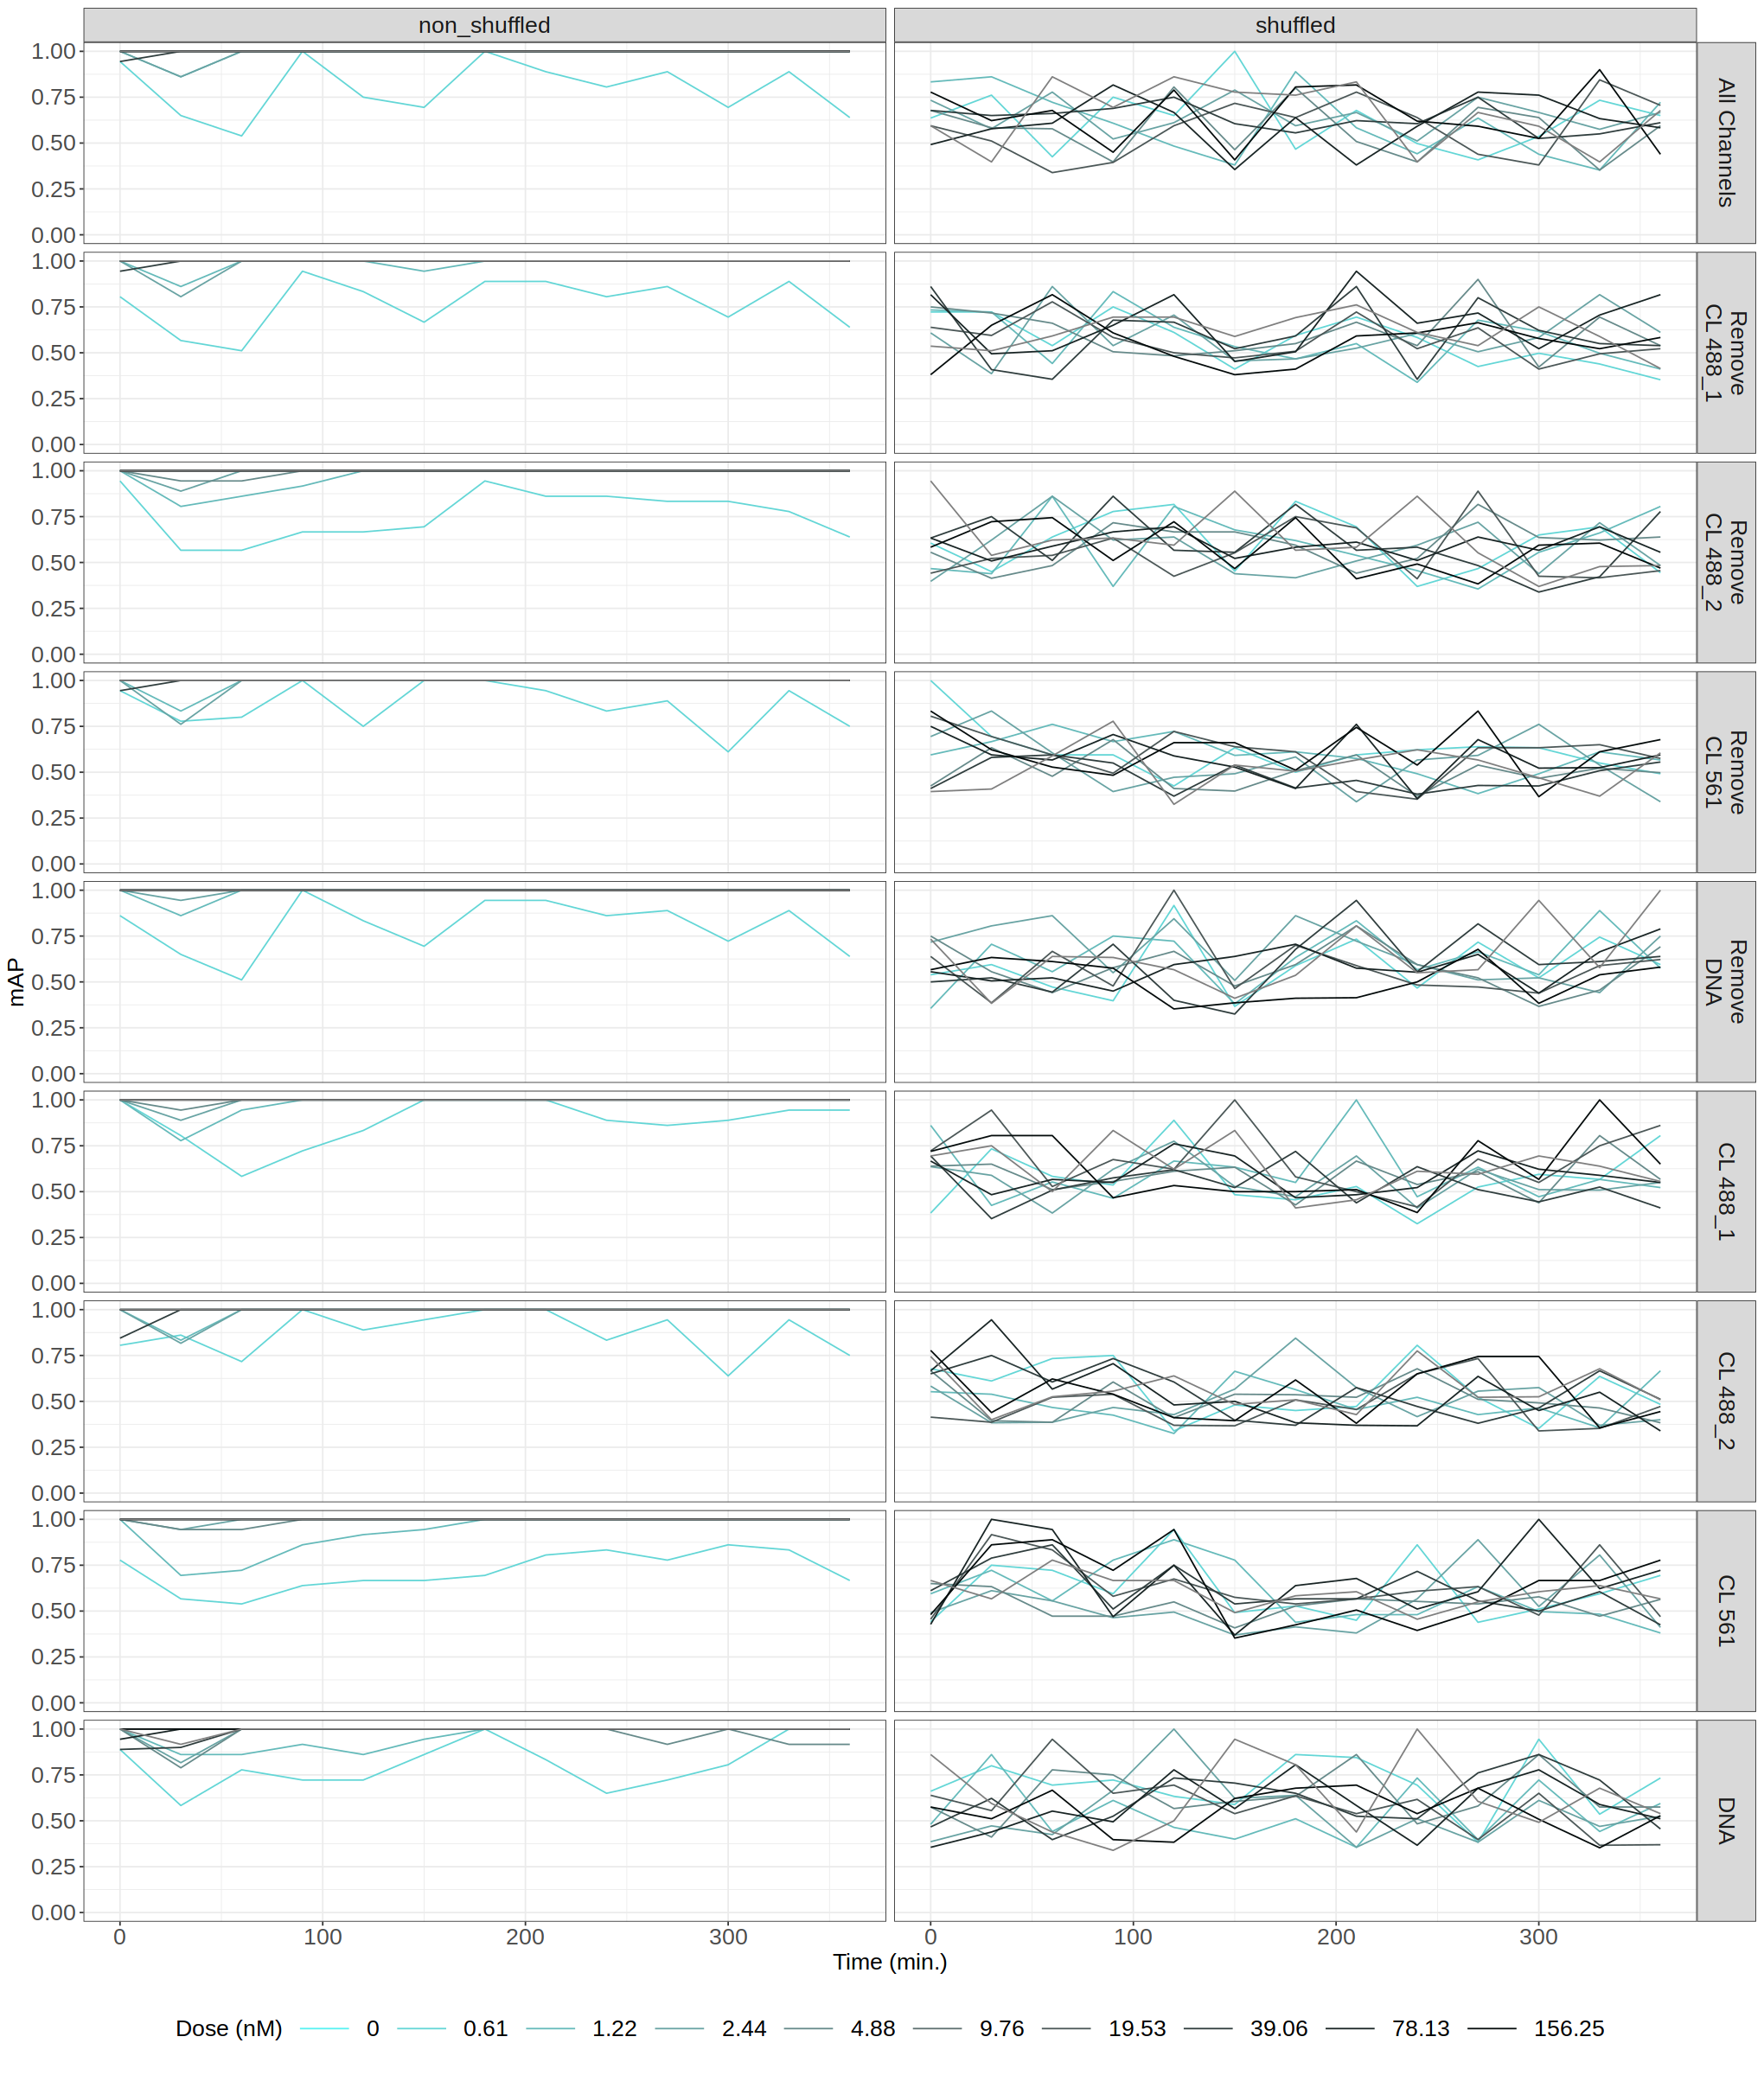

In [8]:
width <- 17
height <- 20
options(repr.plot.width = width, repr.plot.height = height)
channel_subset_plot <- (
    ggplot(across_channels_mAP, aes(x = Metadata_Time, y = mean_average_precision, fill = Metadata_dose,))
    + geom_line(aes(group = interaction(shuffle, Metadata_dose), color = Metadata_dose))
    + facet_grid(Channel ~ shuffle)
    + scale_color_manual(values = color_pallete_for_dose)

    + labs(x="Time (min.)", y = "mAP", fill = "Dose (nM)", color = "Dose (nM)")
    + ylim(0, 1)
    + theme_bw()
    + theme(
        strip.text.x = element_text(size = 16),
        strip.text.y = element_text(size = 16),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.text = element_text(size = 16),

        legend.title = element_text(size = 16),
        legend.position = "bottom",
        legend.box = "horizontal",
        legend.box.just = "left",
        legend.key.size = unit(1.5, "cm"),
        legend.key.width = unit(1.5, "cm"),
    )
    + guides(
        fill = guide_legend(nrow = 1, byrow = TRUE),
        color = guide_legend(nrow = 1, byrow = TRUE)
    )

)
ggsave(
    filename = "../figures/mAP_across_channels.png",
    plot = channel_subset_plot,
    width = width,
    height = height,
    dpi = 600
)
channel_subset_plot